**Train Test and Cross Validation**

In [2]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score


In [3]:
# Load training data
data_path = '/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv'
df = pd.read_csv(data_path)

# Drop missing values
df = df.dropna()

# Features and target variable
X = df.drop('Diabetes Status', axis=1)
y = df['Diabetes Status']


In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the shape after scaling
print(f"📊 NN - Final dataset shape after scaling: {X_scaled.shape}")


📊 NN - Final dataset shape after scaling: (3268, 13)


In [5]:
# Neural Network Classifier setup
nn = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [
        (5, 5, 5),
        (5,5,5,2),
        (5,5,5,3),
        (5,5,5,4),
        (7,5,5,5)                                                                # Test a simpler structure with 3 layers
    ],
    'max_iter': [5000],  # Keep the same maximum iterations for convergence
}


# KFold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup with F1-score as the scoring parameter
grid_search = GridSearchCV(nn, param_grid, scoring='f1', cv=kf, n_jobs=-1, verbose=1)


In [6]:
# Fit GridSearchCV on the training data
grid_search.fit(X_scaled, y)

# Best model from GridSearchCV
best_nn = grid_search.best_estimator_

# Print the best hyperparameters and the best score
print("Best Parameters for Neural Network:", grid_search.best_params_)
print("Best F1-Score with Best Parameters:", grid_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best Parameters for Neural Network: {'hidden_layer_sizes': (5, 5, 5), 'max_iter': 5000}
Best F1-Score with Best Parameters: 0.7635996548620713


In [7]:
# Predictions on training data
y_pred = best_nn.predict(X_scaled)

# Classification report on the training data
print("📌 NN Classification Report on Training Data:")
print(classification_report(y, y_pred))

# Confusion matrix on the training data
print("🟦 NN - Confusion Matrix on Training Data:")
print(confusion_matrix(y, y_pred))


📌 NN Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1638
           1       0.72      0.83      0.77      1630

    accuracy                           0.75      3268
   macro avg       0.76      0.75      0.75      3268
weighted avg       0.76      0.75      0.75      3268

🟦 NN - Confusion Matrix on Training Data:
[[1102  536]
 [ 270 1360]]


In [8]:
# Load validation data
valid_path = "/workspaces/Final-Year-Project/Cleaned Data/ValidationData.csv"
df_valid = pd.read_csv(valid_path)

# Drop any rows with missing values in the validation set
df_valid = df_valid.dropna()

# Prepare features and target for validation data
X_valid = df_valid.drop('Diabetes Status', axis=1)
y_valid = df_valid['Diabetes Status']

# Scale the validation data using the previously fitted scaler
X_valid_scaled = scaler.transform(X_valid)

# Display the shape of the validation dataset
print(f"🧪 NN - Validation dataset shape: {X_valid.shape}")


🧪 NN - Validation dataset shape: (364, 13)


In [9]:
# Predictions on validation data
y_pred_valid = best_nn.predict(X_valid_scaled)


In [10]:
# Print classification report for validation data
print(f"📌 NN - Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Print confusion matrix for validation data
print("🟦 NN - Validation Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))


📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       178
           1       0.74      0.85      0.79       186

    accuracy                           0.77       364
   macro avg       0.78      0.77      0.77       364
weighted avg       0.78      0.77      0.77       364

🟦 NN - Validation Confusion Matrix:
[[122  56]
 [ 28 158]]


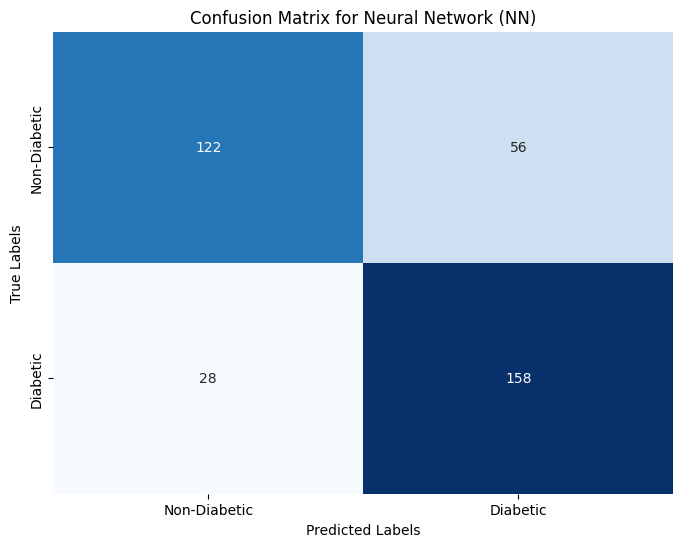

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have y_valid and y_pred_valid (true and predicted labels)
cm = confusion_matrix(y_valid, y_pred_valid)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'], cbar=False)

# Add labels and title
plt.title("Confusion Matrix for Neural Network (NN)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()


In [11]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you already have y_valid (true labels) and y_pred_valid (predicted labels)
# Example classification report for AdaBoost (AB)
report = classification_report(y_valid, y_pred_valid, output_dict=True)

# Extract weighted scores
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a dictionary with the scores
ab_results = {
    'Model': 'Neural Network(NN)',
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'Accuracy': accuracy
}

# Convert the dictionary to a DataFrame
ab_df = pd.DataFrame([ab_results])

# Create a DataFrame to store results (if not already created)
results_df = pd.read_csv("/workspaces/Final-Year-Project/Results/model_results.csv")

# Concatenate the new row to the DataFrame
results_df = pd.concat([results_df, ab_df], ignore_index=True)

# Print the DataFrame to confirm it's added
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv("/workspaces/Final-Year-Project/Results/model_results.csv", index=False)


                               Model  Precision    Recall  F1-Score  Accuracy
0                      AdaBoost (AB)   0.767212  0.752747  0.748389  0.752747
1           Logistic Regression (LR)   0.753372  0.750000  0.748645  0.750000
2                    Naive Bayes(LR)   0.763240  0.755495  0.752966  0.755495
3  K Nearest Nearest Neighbours(KNN)   0.723548  0.722527  0.721802  0.722527
4                  Decision Tree(DT)   0.748498  0.741758  0.739233  0.741758
5                  Random Forest(RF)   0.746618  0.744505  0.743511  0.744505
6        Support Vecotr Machine(SVM)   0.762241  0.755495  0.753238  0.755495
7                 Neural Network(NN)   0.775001  0.769231  0.767458  0.769231


In [12]:
# Recalculate Macro average F1-score on validation data
validation_f1_macro = f1_score(y_valid, y_pred_valid, average='macro')
print(f"🏆 Best Model Validation F1-Score: {validation_f1_macro}")


🏆 Best Model Validation F1-Score: 0.7669512195121951
